<a href="https://colab.research.google.com/github/Sami-1203/AIMLMonth2023/blob/main/%3C23349%3E%3CSamiya_Malhotra%3E%3CMinor_Project%3E(Honda_Car_model_resale).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.kaggle.com/datasets/omartorres25/honda-data

--2023-08-15 13:04:38--  https://www.kaggle.com/datasets/omartorres25/honda-data
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘honda-data’

honda-data              [ <=>                ]  14.13K  --.-KB/s    in 0.008s  

2023-08-15 13:04:39 (1.65 MB/s) - ‘honda-data’ saved [14465]



In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
honda_data = pd.read_csv('honda_sell_data.csv')

In [ ]:
honda_data.head()

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
0,2023,Honda,Ridgeline RTL,New,"$46,370",4.8,9,Platinum White Pearl,Beige,All-wheel Drive,...,830164,10,5.0,4.8,4.8,4.2,5.0,5.0,CA,Dealer
1,2023,Honda,CR-V Hybrid Sport,New,"$34,150",1.7,24,Platinum White Pearl,Black,FWD,...,6402953,–,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
2,2023,Honda,CR-V Hybrid Sport,New,"$34,245",4.7,2869,Meteorite Gray Metallic,Black,Front-wheel Drive,...,PH704805,1,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
3,2022,Honda,Pilot TrailSport,New,"$46,500",5.0,12,Sonic Gray Pearl,Black,All-wheel Drive,...,5700429B,5,5.0,5.0,5.0,5.0,5.0,5.0,CA,Dealer
4,2023,Honda,CR-V Hybrid Sport Touring,New,"$40,395",4.4,12,Crystal Black Pearl,Black,All-wheel Drive,...,5705954,5,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer


#TASK - 1(1)

In [ ]:
honda_data['Condition'].value_counts() ## finding no. of new etc

New                2697
Used               2022
Honda Certified     280
Name: Condition, dtype: int64

New cars are 2697 , used cars are 2022 , Honda certified cars are 280.

# Classifying cars in various categories.

In [ ]:
# Create a function to classify the cars
# Define thresholds for each rating category
excellent_threshold = 4.8
good_threshold = 4.6
fair_threshold = 4

def classify(range):
    if all(range >= excellent_threshold):
        return 'Excellent'
    elif all(range >= good_threshold):
        return 'Good'
    elif all(range >= fair_threshold):
        return 'Fair'
    else:
        return 'poor'

# Apply the classification function to create a new column
honda_data['Classification'] = honda_data[['Reliability_Rating', 'Exterior_Styling_Rating', 'Value_For_Money_Rating',
                               'Performance_Rating', 'Interior_Design_Rating', 'Comfort_Rating']].apply(classify , axis=1)

# Count the number of cars in each classification category
count = honda_data['Classification'].value_counts()


# Print the counts
print(count)

Fair         1770
Excellent    1411
Good          964
poor          854
Name: Classification, dtype: int64


 MISSING VALUES

In [ ]:
honda_data.isnull().sum()

Year                          0
Make                          0
Model                         0
Condition                     0
Price                         0
Consumer_Rating               0
Consumer_Review_#             0
Exterior_Color               11
Interior_Color               11
Drivetrain                   11
MPG                        1485
Fuel_Type                    11
Transmission                 11
Engine                       11
VIN                          11
Stock_#                      11
Mileage                      11
Comfort_Rating              552
Interior_Design_Rating      552
Performance_Rating          552
Value_For_Money_Rating      552
Exterior_Styling_Rating     552
Reliability_Rating          552
State                        73
Seller_Type                  73
Classification                0
dtype: int64

the output above depicts that there are no missing values in the condition column of the dataset.

# TASK 1 (2)

In [ ]:
honda_data = pd.read_csv('honda_sell_data.csv')
honda_data['Price'] = honda_data['Price'].str.replace(',', '')
honda_data['Price'] = honda_data['Price'].str.replace('$', '')
honda_data['Price'] = pd.to_numeric(honda_data['Price'], errors='coerce')
rating = ['Reliability_Rating','Exterior_Styling_Rating','Value_For_Money_Rating','Performance_Rating','Interior_Design_Rating','Comfort_Rating']
resale = 'Price'
rating_and_resale=honda_data[rating + [resale]]
corrl = rating_and_resale.corr()
corrl

,Reliability_Rating,Exterior_Styling_Rating,Value_For_Money_Rating,Performance_Rating,Interior_Design_Rating,Comfort_Rating,Price
Reliability_Rating,1.000000,0.243957,0.263764,0.367080,0.239697,0.548966,0.465818
Exterior_Styling_Rating,0.243957,1.000000,0.647910,0.294613,-0.070760,0.120108,0.109744
Value_For_Money_Rating,0.263764,0.647910,1.000000,0.558766,0.503743,0.021781,-0.092156
Performance_Rating,0.367080,0.294613,0.558766,1.000000,0.617695,0.520266,0.167715
Interior_Design_Rating,0.239697,-0.070760,0.503743,0.617695,1.000000,0.190414,0.137374
Comfort_Rating,0.548966,0.120108,0.021781,0.520266,0.190414,1.000000,0.592254
Price,0.465818,0.109744,-0.092156,0.167715,0.137374,0.592254,1.000000


car ratings and resale value definetly has a correlation between them. it is depicted above in tabular form. correlation coefficient always has a value between -1 and 1.

# TASK 1 (3)

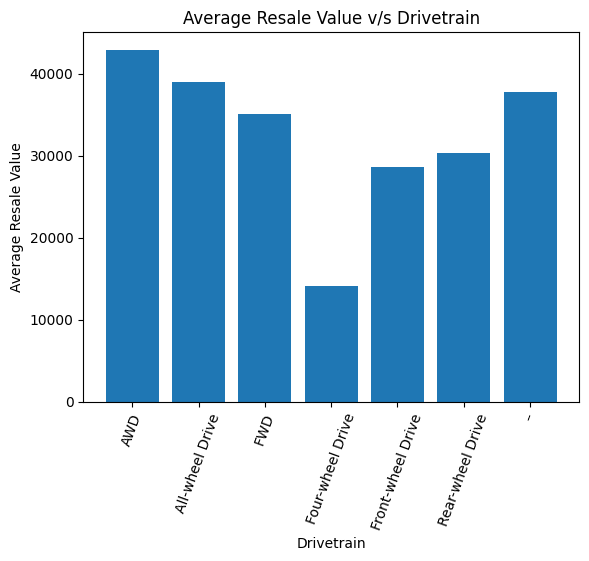

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
honda_data = pd.read_csv('honda_sell_data.csv')


honda_data = honda_data[honda_data['Price'] != 'Not Priced']

# Remove commas and convert 'Price' column to numeric
honda_data['Price'] = honda_data['Price'].str.replace(',', '')
honda_data['Price'] = honda_data['Price'].str.replace('$', '')
honda_data['Price'] = pd.to_numeric(honda_data['Price'], errors='coerce')

# Group the data by drivetrain and calculate the average resale value
average_resale_by_drivetrain = honda_data.groupby('Drivetrain')['Price'].mean()

# Create a bar plot
plt.bar(average_resale_by_drivetrain.index, average_resale_by_drivetrain.values)
plt.xlabel('Drivetrain')
plt.ylabel('Average Resale Value')
plt.title('Average Resale Value v/s Drivetrain')
plt.xticks(rotation = 70)
plt.show()


 the above graph depicts the affect of drivetrain on the resale value. we can see that AWD drivetrain has the maximum resale value and four wheel drive has the least average resale value.

# TASK 1(4)

In [ ]:
from matplotlib.cm import datad
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
honda_data = pd.read_csv('honda_sell_data.csv')




honda_data = honda_data[honda_data['Price'] != 'Not Priced']


honda_data['Price'] = honda_data['Price'].str.replace(',', '')
honda_data['Price'] = honda_data['Price'].str.replace('$', '')
honda_data['Price'] = pd.to_numeric(honda_data['Price'], errors='coerce')


average_resale_by_drivetrain = honda_data.groupby('Transmission')['Price'].mean()
print(average_resale_by_drivetrain)
min_price = average_resale_by_drivetrain.min()
print("Minimum price:", min_price)
max_price = average_resale_by_drivetrain.max()
print("Maximum price:", max_price)


Transmission
1-Speed Automatic                                40240.000000
1-Speed CVT w/OD                                 13990.000000
1-Speed CVT with Overdrive                       34998.888889
10 speed automatic                               41066.142857
10-SPEED A/T                                     46680.461538
10-Speed Automatic                               41743.717073
10-Speed Automatic with Overdrive                43803.833333
141.0HP 1.8L 4 Cylinder Engine Gasoline Fuel     20999.000000
166.0HP 2.4L 4 Cylinder Engine Gasoline Fuel      7900.000000
177.0HP 2.4L 4 Cylinder Engine Gasoline Fuel     11750.000000
2                                                45615.000000
205.0HP 1.5L 4 Cylinder Engine Gasoline Fuel     27900.000000
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel     39500.000000
241.0HP 3.5L V6 Cylinder Engine Gasoline Fuel     8475.000000
4-SPEED A/T                                       4999.000000
4-Speed Automatic                                 9076.25

average resale value with transmission type data is given the price of 4-speed A/T is lowest and that of 10-speed A/T is the highest.

ANNOVA

In [ ]:
import pandas as pd
import scipy.stats as stats

In [ ]:
honda_data = pd.read_csv('honda_sell_data.csv')

In [ ]:
honda_data = honda_data[honda_data['Price'] != 'Not Priced']
honda_data['Price'] = honda_data['Price'].str.replace(',', '')
honda_data['Price'] = honda_data['Price'].str.replace('$', '')
honda_data['Price'] = pd.to_numeric(honda_data['Price'], errors='coerce')


<ipython-input-6-48dd08959067>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  honda_data['Price'] = honda_data['Price'].str.replace('$', '')


In [ ]:
honda_data = honda_data.dropna(subset = ['Price'])

In [ ]:
group_data = honda_data.groupby('Transmission')['Price']

In [ ]:
result = stats.ttest_ind(group_data.get_group ('Automatic'),group_data.get_group ('Manual'))

In [ ]:
print("T static:",result.statistic)
print("P value:" , result.pvalue)

T static: 9.508399076127455
P value: 1.261659000257764e-19


The ANNOVA results indicate a significant difference in the average price along the transmission categories in the dataset.

## TASK 1 (5)

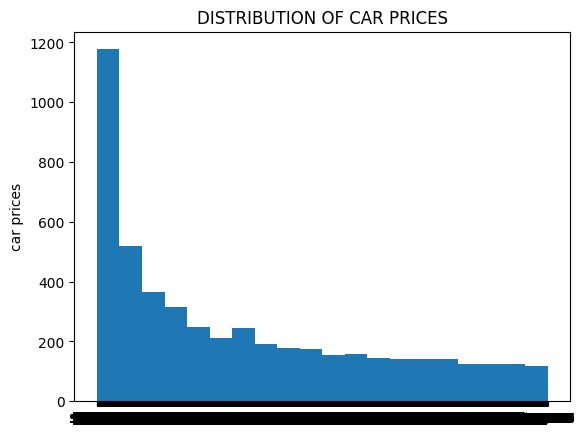

In [ ]:
honda_data = pd.read_csv('honda_sell_data.csv')
plt.hist(honda_data['Price'] , bins = 20)
plt.title("DISTRIBUTION OF CAR PRICES")
plt.ylabel("car prices")

plt.show()

OUTLIER IN PRICING : the unusual pricing of $1995 for a specific car in the dataset can be considered as the outlier as this value is lower as compared to others. This could be due to data entry error , special discount or any other circumstance.

In [ ]:
honda_data.fillna(honda_data.mean(),inplace=True)
honda_data

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
0,2023,Honda,Ridgeline RTL,New,"$46,370",4.8,9,Platinum White Pearl,Beige,All-wheel Drive,...,830164,10,5.00000,4.800000,4.800000,4.200000,5.000000,5.000000,CA,Dealer
1,2023,Honda,CR-V Hybrid Sport,New,"$34,150",1.7,24,Platinum White Pearl,Black,FWD,...,6402953,–,5.00000,3.000000,4.000000,4.000000,5.000000,5.000000,CA,Dealer
2,2023,Honda,CR-V Hybrid Sport,New,"$34,245",4.7,2869,Meteorite Gray Metallic,Black,Front-wheel Drive,...,PH704805,1,5.00000,3.000000,4.000000,4.000000,5.000000,5.000000,CA,Dealer
3,2022,Honda,Pilot TrailSport,New,"$46,500",5.0,12,Sonic Gray Pearl,Black,All-wheel Drive,...,5700429B,5,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,CA,Dealer
4,2023,Honda,CR-V Hybrid Sport Touring,New,"$40,395",4.4,12,Crystal Black Pearl,Black,All-wheel Drive,...,5705954,5,5.00000,3.000000,4.000000,4.000000,5.000000,5.000000,CA,Dealer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,2018,Honda,Accord Sport,Used,"$19,999",5.0,3234,White,Black,Front-wheel Drive,...,U20361,64719,4.80000,4.800000,4.700000,4.700000,4.800000,4.800000,NY,Dealer
4995,2020,Honda,Fit LX,Used,"$17,495",4.3,54,Red,Black,Front-wheel Drive,...,36117,40902,4.70000,4.600000,4.700000,4.800000,4.500000,4.800000,NY,Dealer
4996,2018,Honda,Civic Sport,Used,"$19,500",4.3,1925,White Orchid Pearl,Beige,Front-wheel Drive,...,NA073727A,82906,4.70000,4.700000,4.800000,4.800000,4.900000,4.800000,CT,Dealer
4997,2011,Honda,Accord EX-L,Used,"$17,998",4.6,4,Black,Black,Front-wheel Drive,...,22941503,88050,4.40000,4.500000,4.400000,4.600000,4.500000,4.800000,MA,Dealer


# TASK 2


**LINEAR REGRESSION**

In [ ]:
#Importing important libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
honda_data.columns

Index(['Year', 'Make', 'Model', 'Condition', 'Price', 'Consumer_Rating',
       'Consumer_Review_#', 'Exterior_Color', 'Interior_Color', 'Drivetrain',
       'MPG', 'Fuel_Type', 'Transmission', 'Engine', 'VIN', 'Stock_#',
       'Mileage', 'Comfort_Rating', 'Interior_Design_Rating',
       'Performance_Rating', 'Value_For_Money_Rating',
       'Exterior_Styling_Rating', 'Reliability_Rating', 'State',
       'Seller_Type'],
      dtype='object')

In [ ]:
honda_data['Year'].unique()

array([2023, 2022, 2017, 2016, 2012, 2021, 2020, 2014, 2019, 2018, 2011,
       2000, 2009, 2004, 2015, 2007, 1997, 2013, 2010, 2008, 2005, 1981,
       2006, 2002, 1989, 1987, 2003, 1991, 1992, 2001, 1998, 1999, 1993])

In [ ]:
honda_data.dropna(subset=['Performance_Rating'], inplace=True)

In [ ]:
#Dividing input and Output


X = honda_data[['Year', 'Price']]
Y = honda_data['Performance_Rating']


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
honda_data['Price'].unique()

array([46370, 34150, 34245, ..., 24177, 28955, 17495])

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model.coef_

array([-3.46254973e-03,  6.96777717e-06])

In [ ]:
model.intercept_

11.428821543143407

In [ ]:
model.score(X_train,Y_train)

0.031403232217942056

In [ ]:
model.score(X_test,Y_test)

0.017352290252883096

The above method of linear regression is not a suitable method for this data set as the training score and the test score are very low. Hence we need to apply another model for getting desireable results.

# RANDOM FOREST REGRESSION

In [ ]:
from sklearn.ensemble  import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics  import mean_squared_error, r2_score
error = mean_squared_error(Y_test,Y_pred)
r2 =  r2_score(Y_test,Y_pred)
print("Mean squared error: ",error)
print("R-squared",r2)

Mean squared error:  0.042392978231865
R-squared 0.6647528618478964


In [ ]:
model.score(X_train,Y_train)

0.9423800010171965

In [ ]:
model.score(X_test,Y_test)

0.6647528618478964

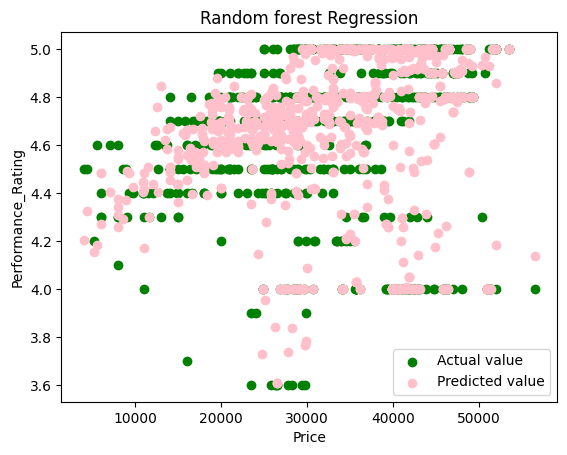

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test['Price'] , Y_test, color = 'green',label = 'Actual value')
plt.scatter(X_test['Price'], Y_pred ,color = 'pink' , label = 'Predicted value')
plt.xlabel('Price')
plt.ylabel('Performance_Rating')
plt.title('Random forest Regression')
plt.legend()
plt.show()

